In [1]:
import rdkit

In [4]:
from rdkit import Chem # Chem 이라는 서브 모듈안에 중요한 기능들이 많이 들어있다. 

In [5]:
m = Chem.MolFromSmiles("C1OC1")

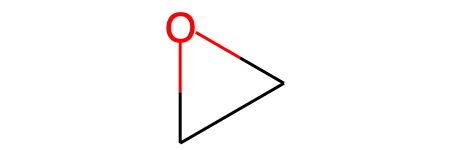

In [6]:
m

In [7]:
# Mol class는 원자 (Atom), Bond 에 대한 정보를 포함하고 있다. 

In [8]:
for atom in m.GetAtoms(): # m 안에 있는 원자 (atom)을 하나씩 돌려준다. 
    print(atom.GetAtomicNum()) # GetAtomicNum() -> 원자 번호를 리턴하는 메쏘드. 
    

6
8
6


In [9]:
# 공유 결합을 하나씩 살펴보자. 
for bond in m.GetBonds():
    print(bond.GetBondType()) # bond-type을 출력. 

SINGLE
SINGLE
SINGLE


In [10]:
atom = m.GetAtomWithIdx(0) # m 이라는 Mol-type 에서 첫번째 atom을 리턴한다. 

In [11]:
type(atom)

rdkit.Chem.rdchem.Atom

In [12]:
atom.GetSymbol()

'C'

In [13]:
m.GetAtomWithIdx(0).GetExplicitValence()

2

In [14]:
m.GetBondWithIdx(0).GetBeginAtomIdx()

0

In [15]:
m.GetBondWithIdx(0).GetEndAtomIdx()

1

In [16]:
m.GetBondWithIdx(1).GetBeginAtomIdx()

1

In [17]:
m.GetBondWithIdx(1).GetEndAtomIdx()

2

In [18]:
m.GetBondWithIdx(2).GetBeginAtomIdx()

2

In [19]:
m.GetBondWithIdx(2).GetEndAtomIdx()

0

In [20]:
m.GetBondBetweenAtoms(0,1).GetBondType()

rdkit.Chem.rdchem.BondType.SINGLE

In [21]:
m.GetBondBetweenAtoms(1,2).GetBondType()

rdkit.Chem.rdchem.BondType.SINGLE

In [24]:
m.GetBondBetweenAtoms(2,0).GetBondType()

rdkit.Chem.rdchem.BondType.SINGLE

In [26]:
atom = m.GetAtomWithIdx(0) # atom index 0 에 해당하는 원자를 atom 이라는 변수에 집어 넣음. 

In [27]:
neighbors = atom.GetNeighbors() # 특정 원자의 neighbors (이웃한 원자들의 리스트)를 리턴

In [28]:
print(neighbors)

(<rdkit.Chem.rdchem.Atom object at 0x7f871138e170>, <rdkit.Chem.rdchem.Atom object at 0x7f87113a38f0>)


In [29]:
type(neighbors)

tuple

In [30]:
for atom2 in neighbors:
    print(atom2.GetSymbol())

O
C


In [31]:
# 예시: 특정 분자안에 Br 이 존재하는가 하지 않는지를 판별하는 함수를 짜보자!

In [32]:
def has_br(m): # input 은 molecule, output: True/False 왜냐, 존재하는지 아닌지만 판별하면 되니까. 
    flag = False # 기본은 Br이 없다고 생각하자. Br이 있으면 flag 가 true가 됨. 
    for atom in m.GetAtoms():
        # atom의 원소 기호를 s변수에 저장.
        s = atom.GetSymbol()
        # 판단. Br 인지 아닌지. 
        if s == "Br":
            # 이 경우에는 Br 이 존재!
            flag = True
        else:
            continue
    return flag

In [33]:
# 또다른 문제로 특정 분자안에 double bond가 몇 개 있는지 count하는 함수를 짜라~

In [34]:
m = Chem.MolFromSmiles('OC1C2C1CC2')

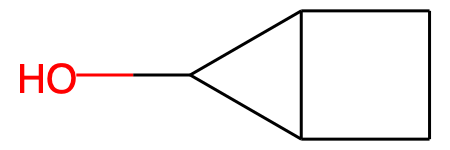

In [35]:
m

In [36]:
m.GetAtomWithIdx(0).IsInRing() # 첫번째 atom이 ring 안에 존재하는지 아닌지. 

False

In [37]:
for atom in m.GetAtoms():
    print(atom.GetSymbol())

O
C
C
C
C
C


In [39]:
print(Chem.MolToMolBlock(m))


     RDKit          2D

  6  7  0  0  0  0  0  0  0  0999 V2000
   -2.5095   -2.5095    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -1.4489   -1.4489    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0607    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0000   -1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.0607    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  1  0
  4  5  1  0
  5  6  1  0
  4  2  1  0
  6  3  1  0
M  END



In [40]:
m.GetAtomWithIdx(1).IsInRing() # 두번째 atom이 ring 안에 존재하는지 아닌지. 

True

In [43]:
m.GetAtomWithIdx(1).IsInRingSize(4)

False

In [44]:
m.GetAtomWithIdx(4).IsInRingSize(3)

False

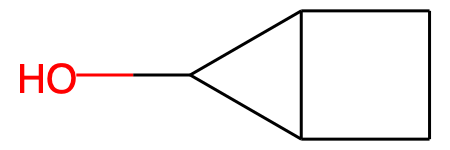

In [45]:
m

In [46]:
print(Chem.MolToMolBlock(m))


     RDKit          2D

  6  7  0  0  0  0  0  0  0  0999 V2000
   -2.5095   -2.5095    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -1.4489   -1.4489    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0607    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0000   -1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.0607    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  1  0
  4  5  1  0
  5  6  1  0
  4  2  1  0
  6  3  1  0
M  END



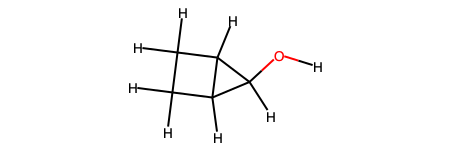

In [47]:
Chem.AddHs(m) # add hydrogen 주의: 새로운 instance를 return한다!

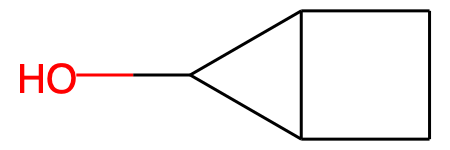

In [48]:
m

In [49]:
m2 = Chem.AddHs(m)

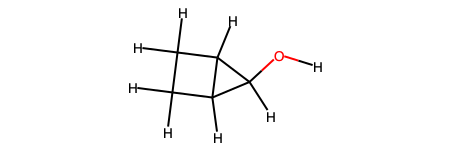

In [50]:
m2

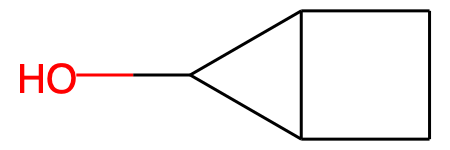

In [51]:
m

In [52]:
m3 = Chem.MolFromSmiles('c1nccc2n1ccc2')

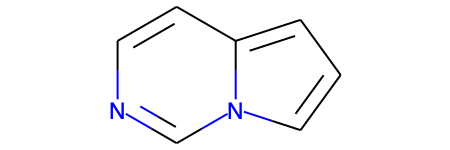

In [53]:
m3

In [54]:
# AllChem submodule을 불러오자. 
from rdkit.Chem import AllChem

In [55]:
AllChem.Compute2DCoords(m3)

0

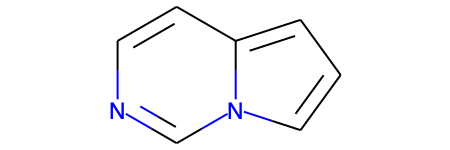

In [56]:
m3

In [57]:
m4 = Chem.MolFromSmiles("CC(C)C1=NC(=CS1)CN(C)C(=O)NC(CCN2CCOCC2)C(=O)NC(CCC(CC3=CC=CC=C3)NC(=O)OCC4=CN=CS4)CC5=CC=CC=C5")

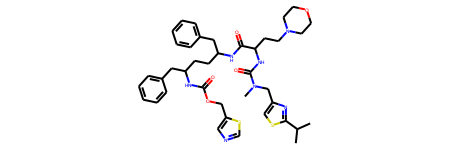

In [58]:
m4

In [59]:
AllChem.Compute2DCoords(m4) # 원자간의 겹침을 최대한 방지하도록 그림생성

0

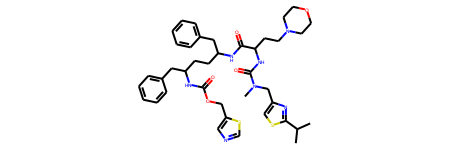

In [60]:
m4

In [61]:
m4_with_H = Chem.AddHs(m4)

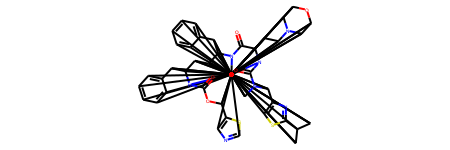

In [62]:
m4_with_H

In [63]:
AllChem.Compute2DCoords(m4_with_H)

0

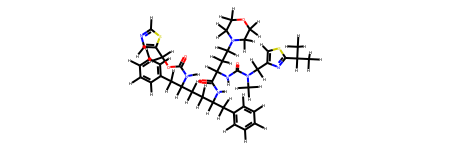

In [64]:
m4_with_H

In [65]:
# 그림 파일로 저장해보자!

In [66]:
from rdkit.Chem import Draw # Draw라는 모듈이 필요함!!

In [67]:
Draw.MolToFile(m4_with_H, "m4_with_H.png") 

In [68]:
Draw.MolToFile(m4_with_H, "m4_with_H.jpg") 

ValueError: Unrecognized file type. Valid choices are pdf, svg, ps, and png

In [69]:
Draw.MolToFile(m4_with_H, "m4_with_H.jpg") 

ValueError: Unrecognized file type. Valid choices are pdf, svg, ps, and png

In [70]:
# svg, png 형식만 가능!

In [73]:
Draw.MolToFile(m4_with_H, "m4_with_H.png") 

In [74]:
Draw.MolToFile(m4, "m4.png")

In [75]:
Draw.MolToFile(m3, "m3.png")

In [77]:
suppl = Chem.SDMolSupplier("data/cdk2.sdf")

OSError: File error: Bad input file data/cdk2.sdf